In [11]:
from DbConn import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def twoweeks_dataframe():
    db=DbConn()
    
    select_query = '''
    select b.moviecd, b.audiacc, bt.max_audiacc
    from boxoffice b 
    inner join moviedetail bt
    on b.moviecd = bt.moviecd
    and b.opendt + 13 = b.dailydate2
    '''
    select_result = pd.read_sql(select_query,db.connection)
    
    print("둘째 주 작업 완료-----------")
    db.disconnect()
    return select_result

In [12]:
dftws = twoweeks_dataframe()

둘째 주 작업 완료-----------


In [13]:
dftws.head()

,MOVIECD,AUDIACC,MAX_AUDIACC
0,20174965,474339,504883
1,20176082,384279,384279
2,20150976,9750486,14401147
3,20179462,909832,1384205
4,20176104,2163438,3388214


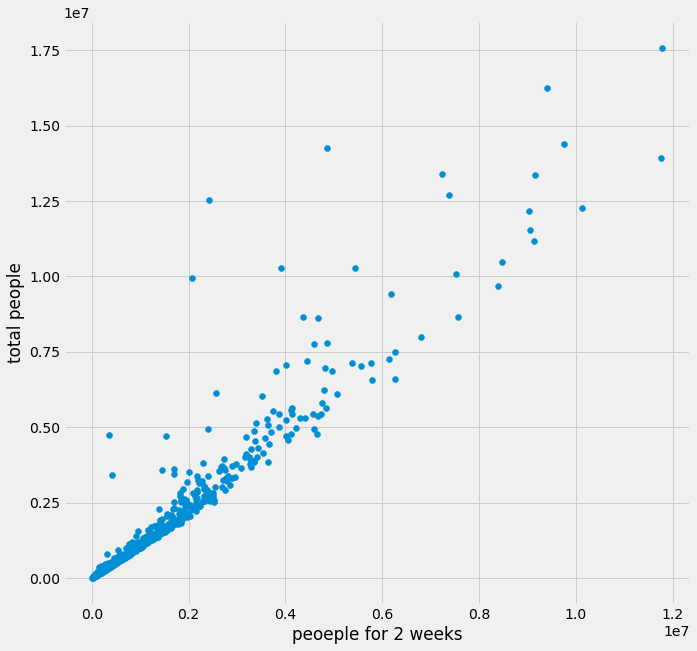

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(dftws['AUDIACC'],dftws['MAX_AUDIACC'])
plt.xlabel('peoeple for 2 weeks')
plt.ylabel('total people')
plt.grid
plt.show()

In [17]:
import seaborn as sns

In [21]:
dftws1=dftws[['AUDIACC','MAX_AUDIACC']]

C:\Users\user\anaconda3\envs\bigdata\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


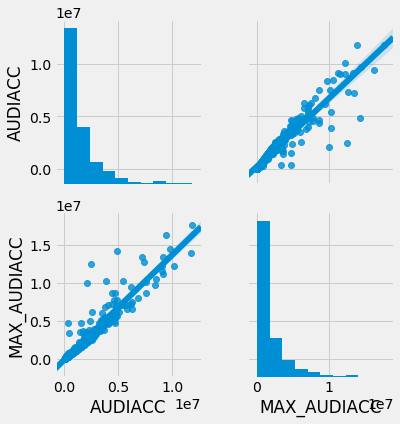

In [26]:
sns.pairplot(dftws1,kind='reg',height=3)# 페어플롯 작

In [28]:
#피었느 상관관계 분석 피어슨 상관게수는 두 변수간의 관련성을 구하기 위해 보편적으로 이용된다
#r 값은 x와 y가 완전히 동일함녀 +1 , 전혀다르면 0 ,반대방향으로 완전히 동일하면 -1 의 값을 가짐

![title](pearsonCor.png)

In [29]:
corr=dftws1.corr(method='pearson')
print(corr)

              AUDIACC  MAX_AUDIACC
AUDIACC      1.000000     0.947866
MAX_AUDIACC  0.947866     1.000000
